In [1]:
!pip install watermark

In [0]:
%load_ext watermark

In [3]:
%watermark -d -v -a 'Sebastian Raschka' -p scikit-learn,nltk,numpy

/usr/local/lib/python3.6/dist-packages/watermark/watermark.py:155: DeprecationWarning: Importing scikit-learn as `scikit-learn` has been depracated and will not be supported anymore in v1.7.0. Please use the package name `sklearn` instead.
  DeprecationWarning)


Sebastian Raschka 2019-07-30 

CPython 3.6.8
IPython 5.5.0

sklearn 0.21.2
nltk 3.2.5
numpy 1.16.4


In [4]:
import pandas as pd

df = pd.read_csv('sample_data/train_lyrics_bangla.txt')

df.head()

,file,artist,title,lyrics,genre,mood,year
0,NaN,নজরুল,ঘুমিয়ে গেছে,ঘুমিয়ে গেছে শ্রান্ত হ​য়ে আমার গানের বুলবুলি,নজ্রুল্গিতি,বেদনা,১৯৬৩
1,NaN,মিনার,দেয়ালে দেয়ালে,বলনা কেন তুমি বহুদূর কেন আমি একা হৃদয়ে ভাঙচুর ...,আধুনিক,বেদনা,২০১৬
2,NaN,সাবিনা ইয়াসমীন,তুমি যে আমার কবিতা,তুমি যে আমার কবিতা আমার বাঁশীর রাগিনী আমার স্ব...,আধুনিক,আনন্দ,১৯৯১
3,NaN,সুমন,বয়্‌স,বয়স তোমার শৈশব ছেলে সুন্দর এই সকাল ধুলোয় তোমার...,আধুনিক,আনন্দ,২০১২
4,NaN,বাচ্চু,ফেরারী এই মনটা আমার,ফেরারী এই মনটা আমার মানে না কোনো বাঁধা তোমাকে ...,ব্যান্ড,বেদনা,১৯৯৫


In [7]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

X_train = df['lyrics'].values 

y_train = df['mood'].values

print('before: %s ...' %y_train[:5])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train[:])


before: ['বেদনা' 'বেদনা' 'আনন্দ' 'আনন্দ' 'বেদনা'] ...
after: [1 1 0 0 1 0 0 0 1 0] ...


In [0]:
# Save object to disk

import pickle

pickle_out = open('./lyrics_label_encoder_py.pkl', 'wb')
pickle.dump(le, pickle_out)
pickle_out.close()

In [9]:
!pip install cltk

     |████████████████████████████████| 614kB 44.2MB/s 
     |████████████████████████████████| 460kB 49.0MB/s 
     |████████████████████████████████| 757kB 46.7MB/s 
     |████████████████████████████████| 1.5MB 48.0MB/s 
     |████████████████████████████████| 655kB 45.6MB/s 
     |████████████████████████████████| 471kB 41.7MB/s 
     |████████████████████████████████| 71kB 29.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/8f/b2/fb/0d01e6387b5d50349564ace5f57a3082f006523c3edcb2d343
  Stored in directory: /root/.cache/pip/wheels/35/e4/80/abf3b33ba89cf65cd262af8a22a5a999cc28fbfabea6b38473
Successfully built cltk regex


In [10]:
from cltk.corpus.utils.importer import CorpusImporter
c = CorpusImporter('bengali')
c.list_corpora

['bengali_text_wikisource']

In [0]:
import string
import re
import unicodedata
from cltk.tokenize.sentence import TokenizeSentence



def porter_tokenizer(text):
    """
    A Porter-Stemmer-Tokenizer hybrid to splits sentences into words (tokens) 
    and applies the porter stemming algorithm to each of the obtained token. 
    Tokens that are only consisting of punctuation characters are removed as well.
    Only tokens that consist of more than one letter are being kept.
    
    Parameters
    ----------
        
    text : `str`. 
      A sentence that is to split into words.
        
    Returns
    ----------
    
    no_punct : `str`. 
      A list of tokens after stemming and removing Sentence punctuation patterns.
    
    """
    tokenizer = TokenizeSentence('bengali')
    bengali_text_tokenize = tokenizer.tokenize(text)
    bengali_text_tokenize
    
    
    return bengali_text_tokenize

In [21]:
porter_tokenizer("নীল আকাশের নিচে আমি রাস্তা চলেছি'। একা এই সবুজ। শ্যামল মায়ায় দৃষ্টি পড়েছে ,ঢাকা। শনশন বাতাসের .গুঞ্জণ |হলো চঞ্চল করে ।এই মন আহা…ও ও হো…আহা। হা হা ও হো… ডাক দিয়ে| যায় কার দুটি| চোখ স্বপ্ন কাজল মাখা|")

["নীল আকাশের নিচে আমি রাস্তা চলেছি'।",
 'একা এই সবুজ।',
 'শ্যামল মায়ায় দৃষ্টি পড়েছে ,ঢাকা।',
 'শনশন বাতাসের .গুঞ্জণ |হলো চঞ্চল করে ।এই মন আহা…ও ও হো…আহা।',
 'হা হা ও হো… ডাক দিয়ে|',
 'যায় কার দুটি|',
 'চোখ স্বপ্ন কাজল মাখা|']

In [22]:
import unicodedata
map(unicodedata.name, u'কয়া')

In [24]:
# Commented out to prevent overwriting files:
#
# stp = nltk.corpus.stopwords.words('english')
# with open('./stopwords_eng.txt', 'w') as outfile:
#    outfile.write('\n'.join(stp))
    
    
with open('sample_data/stopwords_bangla.txt', 'r') as infile:
   stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:])

stop words ['\ufeffঅতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোট

In [0]:
# Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(1,1)
    )

In [26]:
!pip install bangla

In [27]:
vocab = ["ঘুমিয়ে গেছে,ঘুমিয়ে গেছে শ্রান্ত.হয়ে আমার গানের বুলবুলি"]

vec = vec.fit(vocab)

sentence1 = vec.transform(['ঘুমিয়ে গেছ'])
sentence2 = vec.transform(['ঘুমিয়ে'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['ঘুমিয়ে গেছে,ঘুমিয়ে গেছে শ্রান্ত.হয়ে আমার গানের বুলবুলি']
Sentence 1: [[0]]
Sentence 2: [[0]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['কযেক', 'কোটি', 'কোন', 'কোনও', 'কোনো', 'গিযে', 'গোটা', 'জানানো', 'তো', 'তোমার', 'দুটো', 'দেওযা', 'নয', 'নিযে', 'নেওযা', 'পরায', 'পেযর', 'মতো', 'মতোই', 'মোট', 'মোটেই', 'যাওযা', 'হয', 'হযতো', 'হলো', 'হোক'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['নতুন ভোর উঠলো সুরে নিলো তোমার ঘুমকে তুলে তখন ','বেদনার বর্ণ বিহীন এ জীবনে যেন আসে এমনি স্বপ্নের দিন সেই ভাবনায় ভাবি মনে ','তুমি ছুয়ে দিলে মন']
vec = CountVectorizer()
x = vec.fit_transform(corpus).toarray()
print(x.shape)
print(vec.get_feature_names())

(3, 11)
['আস', 'উঠল', 'এমন', 'তখন', 'দন', 'নত', 'বন', 'বপ', 'বর', 'মক', 'মন']


In [0]:
vec = vec.fit(X_train.ravel())

In [30]:
print('Vocabulary size: %s' %len(vec.get_feature_names()))

Vocabulary size: 78


In [31]:
corpus = ['নতুন ভোর উঠলো সুরে নিলো তোমার ঘুমকে তুলে তখন ','বেদনার বর্ণ বিহীন এ জীবনে যেন আসে এমনি স্বপ্নের দিন সেই ভাবনায় ভাবি মনে ','তুমি ছুয়ে দিলে মন']
vec = CountVectorizer()
x = vec.fit_transform(corpus).toarray()
print(x.shape)
print(vec.get_feature_names())

sentence1 = vec.transform([u'নতুন ভোর উঠলো সুরে নিলো তোমার ঘুমকে তুলে তখন'])
sentence2 = vec.transform(['বেদনার বর্ণ বিহীন এ জীবনে যেন আসে এমনি স্বপ্নের দিন'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

(3, 11)
['আস', 'উঠল', 'এমন', 'তখন', 'দন', 'নত', 'বন', 'বপ', 'বর', 'মক', 'মন']
TEST:
Vocabulary: ['আস', 'উঠল', 'এমন', 'তখন', 'দন', 'নত', 'বন', 'বপ', 'বর', 'মক', 'মন']
Sentence 1: [[0 1 0 1 0 1 0 0 0 1 0]]
Sentence 2: [[1 0 1 0 1 0 1 1 1 0 0]]


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer
    )

In [33]:
tfidf = vec.fit(X_train.ravel())

print('Vocabulary size: %s' %len(tfidf.get_feature_names()))

Vocabulary size: 78


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

In [0]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

In [49]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BernoulliNB())
])

parameters_1 = dict(
    vect__binary=[True],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[porter_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=110, 
                           verbose=110,
                           scoring=f1_scorer,
                           cv=2
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
print("parameters:")
pprint(parameters_1, depth=2)
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [True],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function porter_tokenizer at 0x7efc828a2a60>, None]}
Fitting 2 folds for each of 12 candidates, totalling 24 fits
[Parallel(n_jobs=110)]: Using backend LokyBackend with 110 concurrent workers.
Pickling array (shape=(10,), dtype=object).
Pickling array (shape=(10,), dtype=int64).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(10,), dtype=object).
Pickling array (shape=(10,), dtype=int64).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(10,), dtype=object).
Pickling array (shape=(10,), dtype=int64).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(10,), dtype=object).
Pickling array (shape=(10,), dtype=int64).
Pickling array 

ValueError: ignored

In [52]:
final_clf = Pipeline([
                ('vect', TfidfVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=porter_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['\ufeffঅতএব', 'অথচ', 'অথবা',
                                             'অনুযায়ী', 'অনেক', 'অনেকে',
                                             'অনেকে...
                                             'আগে', 'আগেই', 'আছে', 'আজ',
                                             'আদ্যভাগে', 'আপনার', 'আপনি',
                                             'আবার', 'আমরা', 'আমাকে', 'আমাদের',
                                             'আম

In [56]:
!pip install -U statsmodels

     |████████████████████████████████| 8.1MB 94kB/s 
  Found existing installation: statsmodels 0.10.0
    Uninstalling statsmodels-0.10.0:
      Successfully uninstalled statsmodels-0.10.0


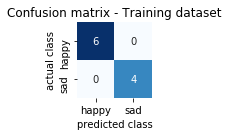

In [64]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cm = metrics.confusion_matrix(y_train, final_clf.predict(X_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('sample_data/confmat_training.eps', dpi=300)
plt.show()

In [0]:
df = pd.read_csv('sample_data/train_lyrics_bangla.txt')

X_valid = df['lyrics'].values 
y_valid = df['mood'].values

y_valid = le.transform(y_valid)

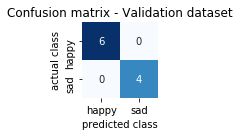

In [67]:
cm = metrics.confusion_matrix(y_valid, final_clf.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('sample_data/confmat_valid.eps', dpi=300)
plt.show()

In [0]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [0]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}

In [0]:
d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_train, y_true=y_train))
d['ROC AUC (%)'].append(auc_scorer(estimator=final_clf, X=X_train, y_true=y_train))

d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['ROC AUC (%)'].append(auc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))

In [71]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
Training,100.0,100.0,100.0,100.0,100.0
Validation,100.0,100.0,100.0,100.0,100.0


In [0]:
df_perform.to_csv('sample_data/clf_performance.csv', index_label=False)

In [0]:
lyrics_clf_1000 = final_clf

pickle_out = open('sample_data/lyrics_clf_1000_py27_our_own.pkl', 'wb')
pickle.dump(lyrics_clf_1000, pickle_out)
pickle_out.close()